# 線形回帰モデル（実データ・単回帰）
- 実際のデータを使って線形回帰を行う

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. データの読み込み 

In [2]:
# CSVファイルの読み込み
df_diamond = pd.read_csv("../../1_data/ch2/diamond_data.csv")

# ダイヤモンドの重さの単位であるカラットとその価格に関する実際のデータ
#『回帰分析入門』より引用
display(df_diamond.head())
df_diamond.describe()

,carat,price
0,0.30,1302
1,0.30,1510
2,0.30,1510
3,0.30,1260
4,0.31,1641


,carat,price
count,308.000000,308.000000
mean,0.630909,5019.483766
std,0.277183,3403.115715
min,0.180000,638.000000
25%,0.350000,1625.000000
50%,0.620000,4215.000000
75%,0.850000,7446.000000
max,1.100000,16008.000000


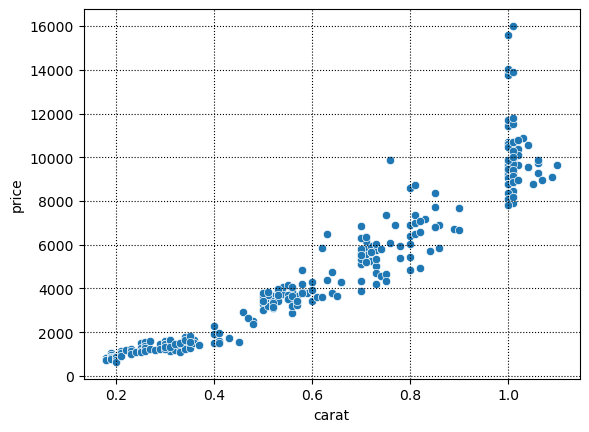

In [3]:
# 学習用データ作成
x = df_diamond["carat"].values
# 正解データ作成
y = df_diamond["price"].values

# データの散布図
sns.scatterplot(x=x, y=y, marker='o')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('price')
plt.xlabel('carat')
plt.show()

## 3. [演習] モデルの学習
- scikit-learnを用いて線形回帰を実装しよう
- w0, w1, 二乗誤差を表示し、回帰直線（モデルからの出力）をグラフに重ねて表示しよう

w0 = -2298.358, w1 = 11598.884, 二乗誤差 = 1240839.690


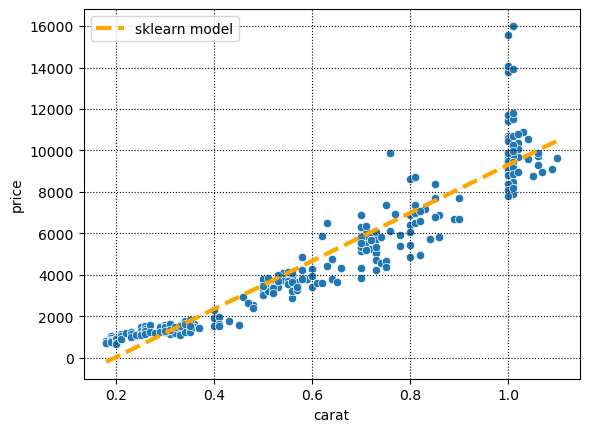

In [4]:
# scikit learn で使用できる2次元の配列へ変換
X = x.reshape(-1,1)
# 線形回帰モデルをインスタンス化
regr = LinearRegression(fit_intercept=True)
# モデルを学習させる
regr.fit(X, y)
# モデルから予測を得る
y_est_sklearn = regr.predict(X)
squared_error = mean_squared_error(y, y_est_sklearn)
print("w0 = {:.3f}, w1 = {:.3f}, 二乗誤差 = {:.3f}".format(regr.intercept_, regr.coef_[0], squared_error))

# グラフに重ねて表示する
sns.scatterplot(x=x, y=y, marker='o')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('price')
plt.xlabel('carat')
sns.lineplot(x=x, y=y_est_sklearn, linestyle='--', linewidth=3, color='orange', label='sklearn model')
plt.show()